# Used Vehicle Price Prediction by Various ML Models 

The task is predicting the sell price for the car.
This dataset contains information about used cars listed on www.cardekho.com.
Ref: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

**1. Import Modules, Load Data and Data Review**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


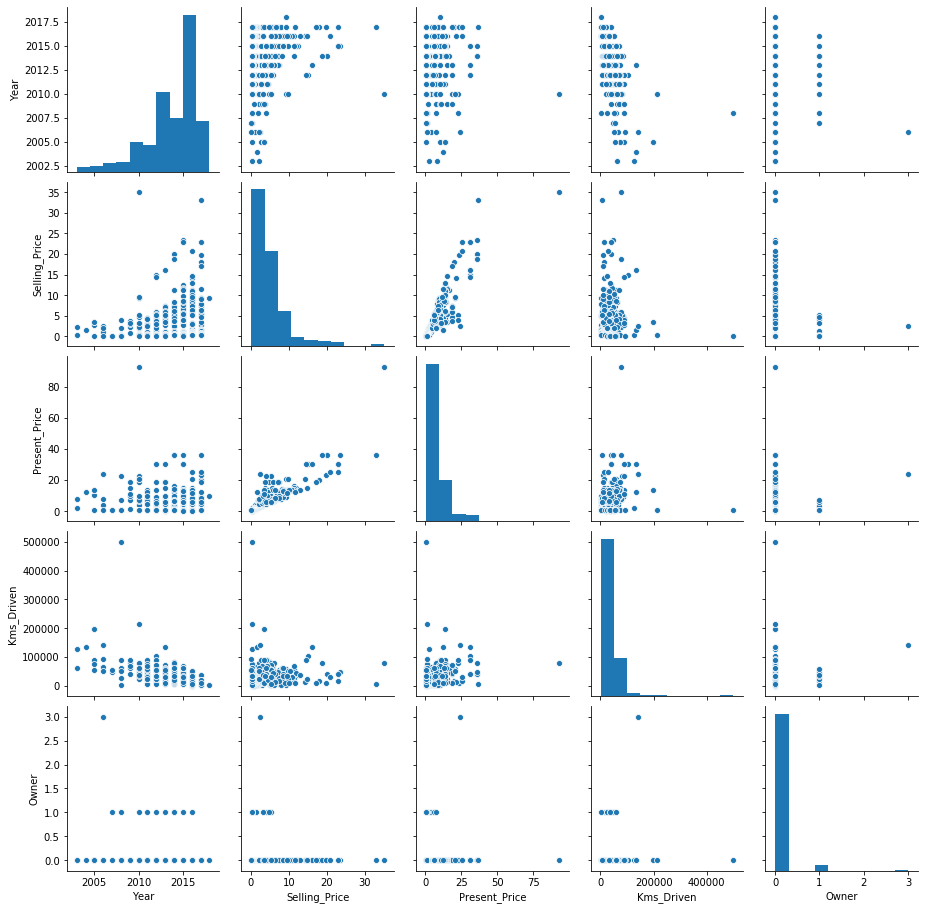

In [8]:
sns.pairplot(df)

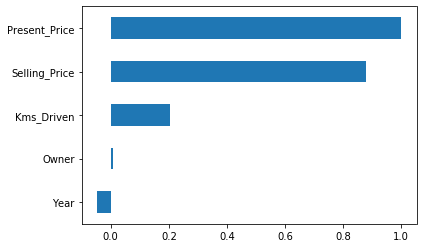

In [9]:
df.corr()['Present_Price'].sort_values().head(10).plot.barh();

In [10]:
df.drop('Car_Name', axis=1, inplace = True)

In [11]:
df = pd.get_dummies(df, drop_first= True)

In [12]:
df.sample(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
88,2013,3.45,6.05,47000,0,0,1,0,1
16,2015,7.25,10.79,41678,0,1,0,0,1
294,2014,3.75,6.80,33019,0,0,1,0,1
209,2015,4.85,5.70,21125,0,1,0,0,1
253,2014,7.20,9.90,48000,0,1,0,0,1
49,2017,7.75,9.29,37000,0,0,1,0,0
248,2013,4.00,4.60,30000,0,0,1,0,1
56,2015,4.50,7.27,40534,0,0,1,0,1
151,2016,0.50,0.55,31000,0,0,1,1,1
217,2016,3.15,4.43,15000,0,0,1,0,1


In [13]:
df.shape

(301, 9)

In [14]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [15]:
df.drop('Owner', axis=1, inplace = True)

In [16]:
from datetime import datetime

In [17]:
today = datetime.today()

In [18]:
this_year=today.year
this_year

2020

In [19]:
df['age'] = this_year - (df['Year'])

In [20]:
df.drop(['Year'], axis = 1, inplace = True)

**2. Data Pre-Processing**

In [21]:
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,3.35,5.59,27000,0,1,0,1,6
1,4.75,9.54,43000,1,0,0,1,7
2,7.25,9.85,6900,0,1,0,1,3


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Present_Price',axis=1)
y = df['Present_Price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**3. Implement Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.score(X_train, y_train)

0.8424100130580641

In [28]:
y_pred = model.predict(X_test)

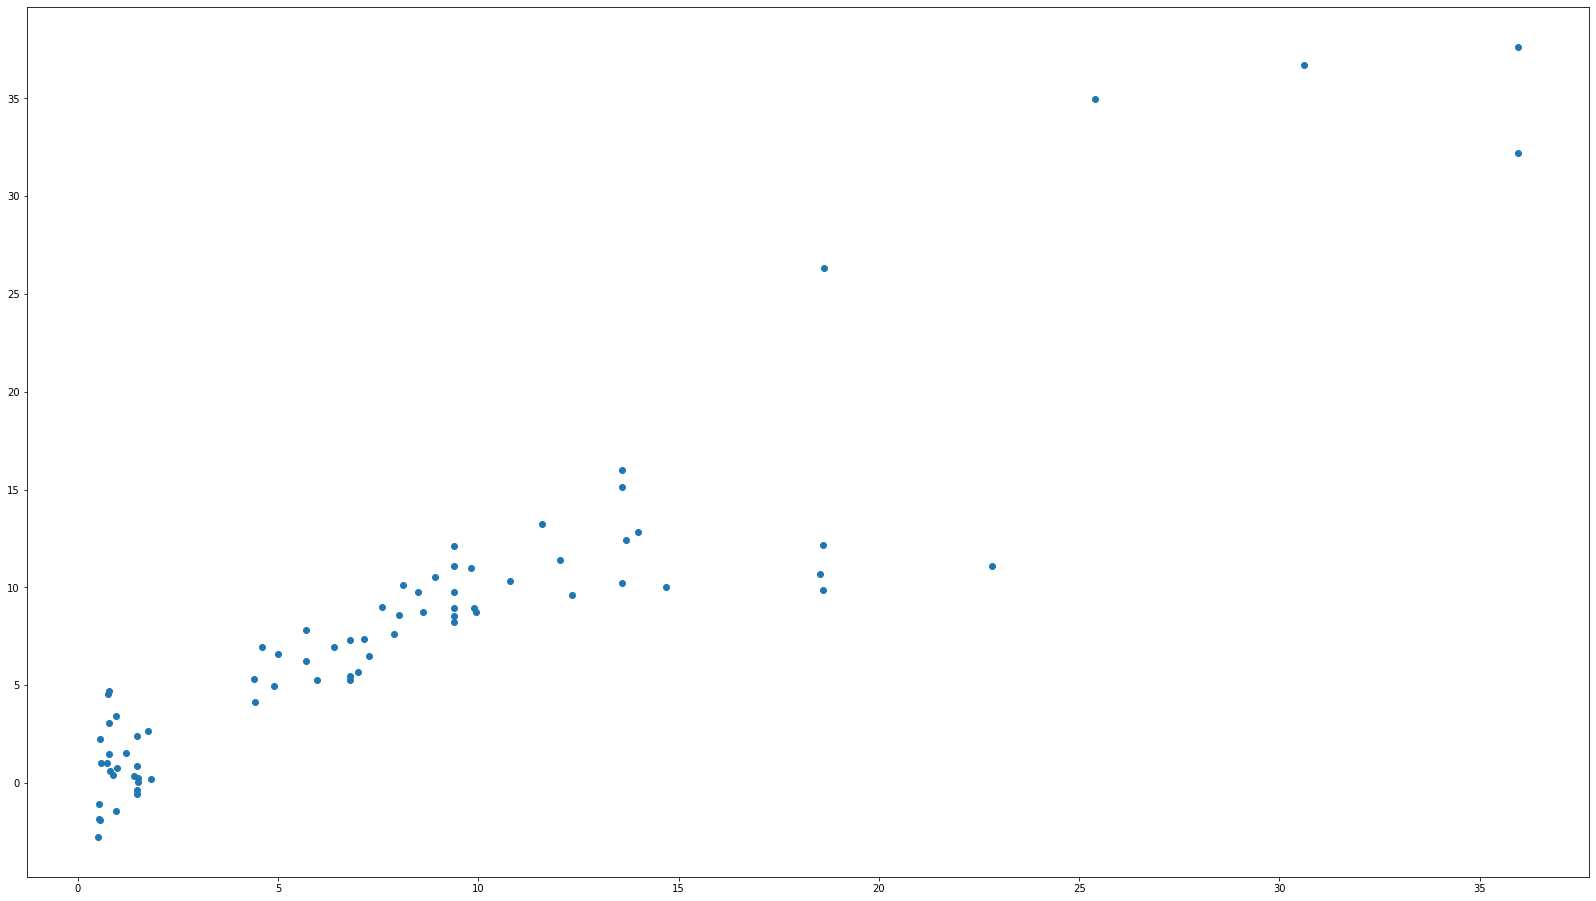

In [29]:
plt.figure(figsize=(28,16))
plt.scatter(y_test, y_pred);

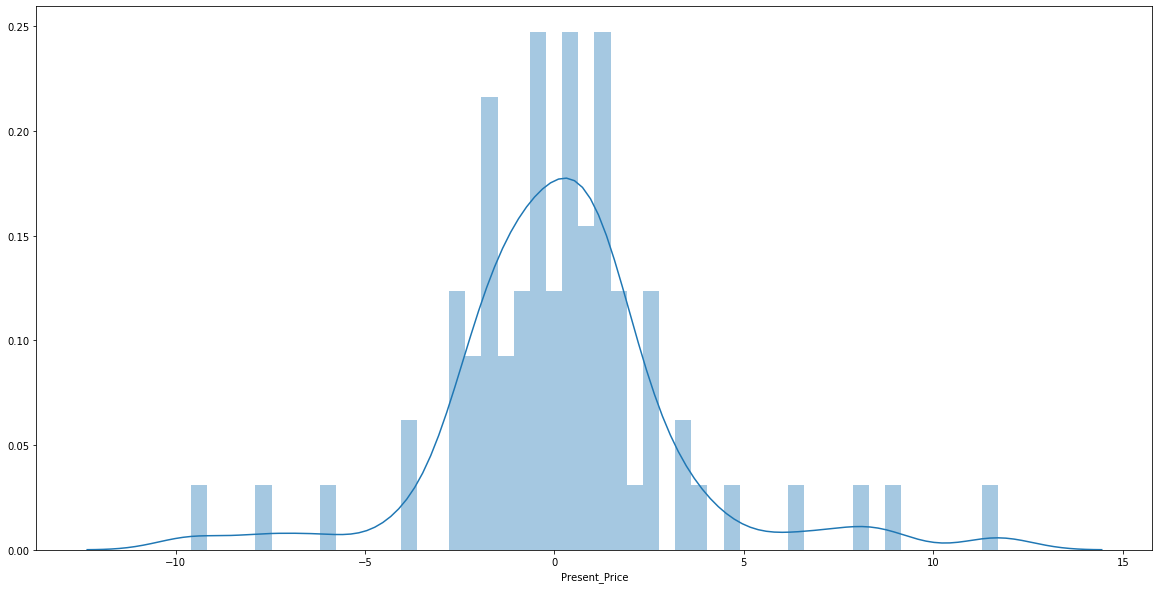

In [30]:
plt.figure(figsize=(20,10))
sns.distplot((y_test-y_pred), bins = 50);

In [31]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [32]:
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
Selling_Price,1.732990
Kms_Driven,0.000011
Fuel_Type_Diesel,-1.975796
Fuel_Type_Petrol,-0.879313
Seller_Type_Individual,0.464113
Transmission_Manual,0.724938
age,0.730959


In [33]:
eval_metrics(y_test, y_pred)

r2_score: 0.846517419106657 
 mae: 2.0636011690182468 
 mse: 9.452221009582583 
 rmse: 3.074446455800228


In [34]:
y_pred_train=model.predict(X_train)

In [35]:
eval_metrics(y_train, y_pred_train)

r2_score: 0.8424100130580641 
 mae: 2.003435093873045 
 mse: 12.407215179664544 
 rmse: 3.5223877100149754


In [36]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [37]:
compare.sample(10)

,Actual,Pred
6,8.12,10.146145
108,1.50,0.252796
57,18.54,10.664596
266,7.00,5.676012
25,4.99,6.583989
104,1.47,-0.365053
82,25.39,34.983792
116,1.47,2.430833
275,13.60,16.008468
240,9.40,8.959242


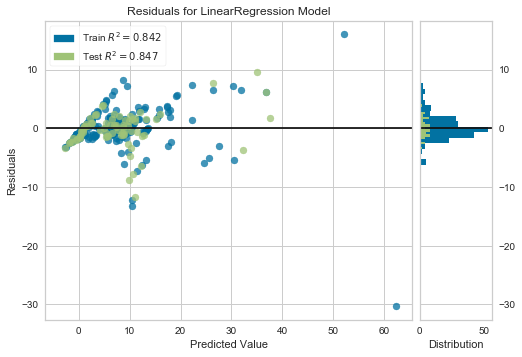

In [38]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

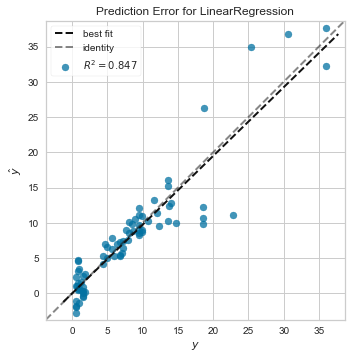

In [39]:
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
model = model
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**4. Implement Ridge Regression**

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [42]:
ridge_model =  Ridge(normalize = True)

In [43]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [44]:
y_pred = ridge_model.predict(X_test)

In [45]:
eval_metrics(y_test, y_pred)

r2_score: 0.7537113351862359 
 mae: 2.666471650577965 
 mse: 15.167681429545702 
 rmse: 3.8945707631965942


In [46]:
alpha_space = np.linspace(0.1, 20, 50)

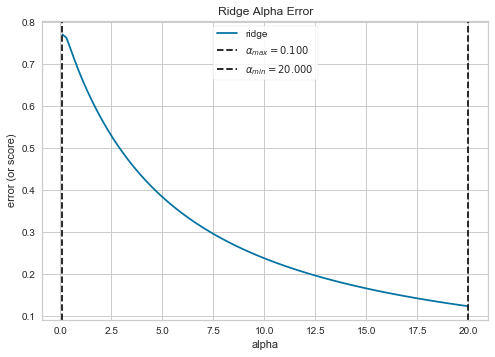

In [47]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [48]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8672106542002838 
 mae: 1.8712932237514524 
 mse: 8.177828629875771 
 rmse: 2.859690303140494


In [49]:
ridge_model = Ridge(0.0001, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8465669431617362 
 mae: 2.063204070476945 
 mse: 9.449171071855611 
 rmse: 3.073950401658363


**5. Implement Lasso Regression**

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
scaled_data=pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_data.head()

,Selling_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,-0.763347,-0.761473,-0.47907,0.493046,1.346291,0.369274,-1.148467
1,1.364051,-0.577291,-0.47907,0.493046,-0.742781,-2.708013,-0.454762
2,-0.882975,-0.062048,-0.47907,0.493046,1.346291,0.369274,-0.454762
3,1.015134,-0.370261,-0.47907,0.493046,-0.742781,0.369274,-0.454762
4,0.127888,-0.540804,-0.47907,0.493046,-0.742781,0.369274,-0.454762


In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [56]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.834552152559684 
 mae: 1.9434708994969239 
 mse: 10.189101658723787 
 rmse: 3.192037227026619


In [57]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lasso_model, X=scaled_X_train, y=y_train, cv=10)
cv_scores.mean()

0.7825347723615546

In [58]:
cv_scores

array([0.83135468, 0.65223465, 0.78701035, 0.50555616, 0.86958628,
       0.91888311, 0.80899626, 0.7380652 , 0.84562674, 0.86803428])

In [59]:
y.mean()

7.628471760797344

In [60]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(scaled_X_train, y_train)

In [61]:
lasso_cv_model.alpha_

0.5061224489795918

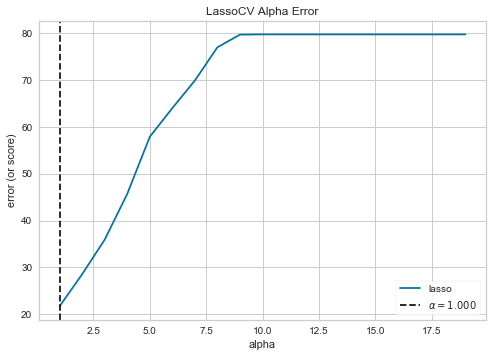

In [62]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = range(1,20)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(scaled_X_train, y_train)
visualizer.show()

In [65]:
lasso_model = Lasso(0.5061).fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8504818643764775 
 mae: 1.896668875052927 
 mse: 9.208070744108623 
 rmse: 3.034480308736345


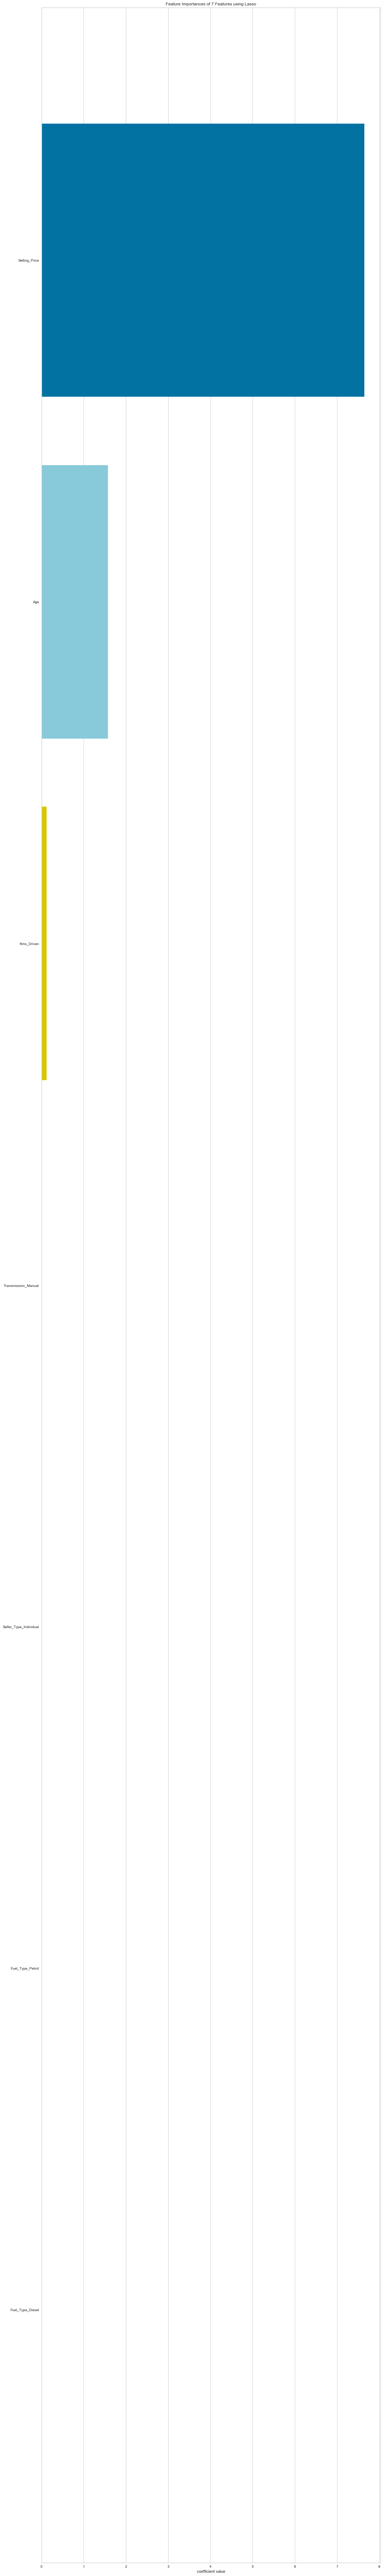

In [66]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(scaled_X_train, y_train)
viz.show()

In [67]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

3

In [70]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
0,Selling_Price,7.646856
6,age,1.573056
1,Kms_Driven,0.122790


In [71]:
X_new=X[significant_features.features]

In [72]:
X_new.shape

(301, 3)

In [73]:
y.shape

(301,)

In [74]:
X_new.head()

,Selling_Price,Kms_Driven,age
0,3.35,27000,6
1,4.75,43000,7
2,7.25,6900,3
3,2.85,5200,9
4,4.60,42450,6


**Linear Regression with Reduced Columns**

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred = lm.predict(X_test)

In [78]:
eval_metrics(y_test, y_pred)

r2_score: 0.8964687726397079 
 mae: 1.7712014897026302 
 mse: 5.332714283872056 
 rmse: 2.30926704472914


**5. Implement Random Forest Method**

In [79]:
X.head(3)

,Selling_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age
0,3.35,27000,0,1,0,1,6
1,4.75,43000,1,0,0,1,7
2,7.25,6900,0,1,0,1,3


In [80]:
y.head(3)

0    5.59
1    9.54
2    9.85
Name: Present_Price, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
# now predict
y_head=rfc.predict(X_test)

In [110]:
from sklearn.metrics import r2_score

In [111]:
print('r2 score:',r2_score(y_test,y_head))

r2 score: 0.8243879540625603


In [112]:
eval_metrics(y_test, y_head)

r2_score: 0.8243879540625603 
 mae: 1.4906911098900828 
 mse: 9.896135197067082 
 rmse: 3.1458123270575253


**6. Implement Decision Tree Regression Method**

In [113]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42) # random state
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [114]:
y_head=tree_reg.predict(X_test)

In [115]:
print('r2 score:',r2_score(y_test,y_head))

r2 score: 0.7942449242807657


In [116]:
eval_metrics(y_test, y_head)

r2_score: 0.7942449242807657 
 mae: 1.7737802197802197 
 mse: 11.594762967032965 
 rmse: 3.405108363478755
